In [1]:
import pandas as pd
import geopandas as gpd
import duckdb

# State

In [2]:
#load shapefile
state_geo = gpd.read_file('../data/shapefiles/tl_2023_us_state/tl_2023_us_state.shp')
#select columns GEOID, geometry
state_geo = state_geo[['GEOID','NAME', 'geometry']]
# #convert GEOID10 to int
state_geo['GEOID'] = state_geo['GEOID'].astype(int)
#rename Name to state_name
state_geo.rename(columns={'NAME':'state_name'}, inplace=True)
state_geo.head()

,GEOID,state_name,geometry
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [3]:
#read in state population data
state_pop = pd.read_csv('../data/csv/ACS2022-state-ppl.csv')
#only get GEOID and SE_A01001_002
state_pop = state_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
state_pop = state_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})

In [4]:
#merge state_geo and state_pop
state = state_geo.merge(state_pop, on='GEOID')

In [5]:
state

,GEOID,state_name,geometry,ppl_density
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.578890
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.224200
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.812600
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.520520
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.497900
5,44,Rhode Island,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",1058.381000
6,16,Idaho,"POLYGON ((-116.35844 49.00047, -116.34805 49.0...",22.434580
7,33,New Hampshire,"POLYGON ((-70.83887 43.24449, -70.83886 43.244...",154.081700
8,37,North Carolina,"POLYGON ((-77.89977 36.54460, -77.89942 36.544...",215.330200
9,50,Vermont,"POLYGON ((-72.04187 44.15665, -72.04180 44.156...",69.849030


In [6]:
#get the max and min of ppl_density
max_ppl = state['ppl_density'].max()
min_ppl = state['ppl_density'].min()

In [8]:
min_ppl

1.286849

<Axes: >

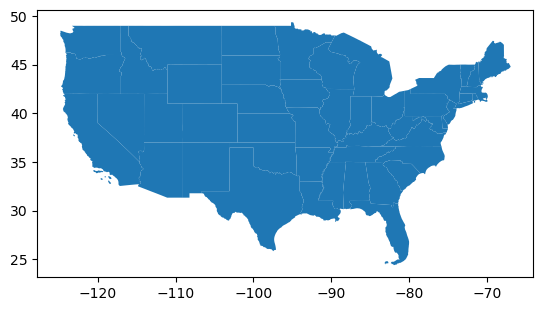

In [38]:
#limit the map to the contiguous US
state = state.cx[-125:-66, 25:50]
state.plot()

In [10]:
#state.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'quantiles', k=10)

In [39]:
#get the centroid of each state
state['centroid'] = state.centroid
#change centroid to two columns centroid_lat and centroid_lon
state['c_lat'] = state['centroid'].apply(lambda x: x.y)
state['c_lon'] = state['centroid'].apply(lambda x: x.x)
state.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_17521/3892722596.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  state['centroid'] = state.centroid
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,GEOID,state_name,geometry,ppl_density,centroid,c_lat,c_lon
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.57889,POINT (-80.61371 38.64257),38.642567,-80.613707
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.22420,POINT (-82.54411 28.42369),28.423686,-82.544110
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.81260,POINT (-89.14863 40.12420),40.124202,-89.148634
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.52052,POINT (-94.19831 46.34937),46.349372,-94.198314
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.49790,POINT (-76.68718 38.94649),38.946494,-76.687177


In [40]:
# change the column order to have geometry at the end
state = state[['GEOID', 'state_name', 'ppl_density', 'c_lat', 'c_lon', 'geometry']]
state.head()

,GEOID,state_name,ppl_density,c_lat,c_lon,geometry
0,54,West Virginia,74.57889,38.642567,-80.613707,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,403.22420,28.423686,-82.544110,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,229.81260,40.124202,-89.148634,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,71.52052,46.349372,-94.198314,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,634.49790,38.946494,-76.687177,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [41]:
#export to shapefile
state.to_file('../data/processed/ppl_density/00_state/state_ppl_density.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_17521/49950578.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  state.to_file('../data/processed/ppl_density/00_state/state_ppl_density.shp')


# County

In [29]:
# ready county data
county_geo = gpd.read_file('../data/shapefiles/tl_2023_us_county/tl_2023_us_county.shp')
#select columns GEOID, geometry
county_geo = county_geo[['GEOID', 'geometry']]
#convert GEOID10 to int
county_geo['GEOID'] = county_geo['GEOID'].astype(int)
county_geo

,GEOID,geometry
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...
3230,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [30]:
# read in population data per county
county_pop = pd.read_csv('../data/csv/ACS2022-county-ppl.csv')
#only get GEOID and SE_A01001_002
county_pop = county_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
county_pop = county_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
county_pop

,GEOID,ppl_density
0,1001,98.84851
1,1003,146.81770
2,1005,28.10935
3,1007,35.74633
4,1009,91.60778
...,...,...
3217,72145,1181.76900
3218,72147,161.43440
3219,72149,616.89250
3220,72151,549.00320


In [47]:
#merge county_geo and county_pop
county = county_geo.merge(county_pop, on='GEOID')
county

,GEOID,geometry,ppl_density
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",15.775040
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",17.023660
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",0.729626
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",384.524800
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",7.114601
...,...,...,...
3217,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577...",73.950830
3218,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885...",9.148537
3219,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400...",152.944400
3220,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2...",38.286330


In [43]:
#limit the map to the contiguous US
county = county.cx[-125:-66, 25:50]

In [48]:
#limit to only the west coast
county = county.cx[-125:-100, 30:50]

<Axes: >

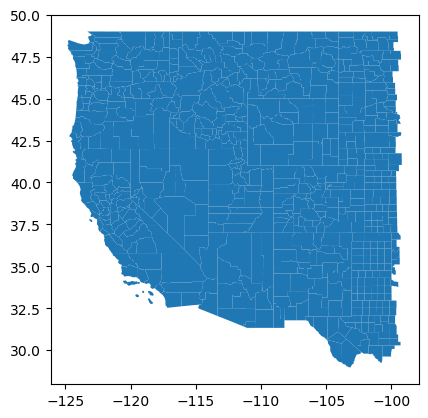

In [49]:
county.plot()

In [50]:
#get the centroid of each county
county['centroid'] = county.centroid
#change centroid to two columns centroid_lat and centroid_lon
county['c_lat'] = county['centroid'].apply(lambda x: x.y)
county['c_lon'] = county['centroid'].apply(lambda x: x.x)
#drop the centroid column
county = county.drop(columns=['centroid'])
county.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_20802/1849564452.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county['centroid'] = county.centroid
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,GEOID,geometry,ppl_density,c_lat,c_lon
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",17.023660,46.291134,-123.433470
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",0.729626,34.342414,-104.411958
7,48327,"POLYGON ((-99.77120 30.71079, -99.78240 30.710...",2.177319,30.889782,-99.820636
8,6091,"POLYGON ((-120.55587 39.50874, -120.55614 39.5...",3.059271,39.580400,-120.515996
11,48189,"POLYGON ((-102.09041 34.31313, -102.08890 34.3...",32.373490,34.070513,-101.826881


In [18]:
# county.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'quantiles', k=10)

In [51]:
#change the column order to have geometry at the end
county = county[['GEOID', 'ppl_density', 'c_lat', 'c_lon', 'geometry']]
county.head()

,GEOID,ppl_density,c_lat,c_lon,geometry
1,53069,17.023660,46.291134,-123.433470,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35011,0.729626,34.342414,-104.411958,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
7,48327,2.177319,30.889782,-99.820636,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
8,6091,3.059271,39.580400,-120.515996,"POLYGON ((-120.55587 39.50874, -120.55614 39.5..."
11,48189,32.373490,34.070513,-101.826881,"POLYGON ((-102.09041 34.31313, -102.08890 34.3..."


In [52]:
#export to shapefile
county.to_file('../data/processed/ppl_density/01_county/w_county_ppl_density.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_20802/2530433041.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county.to_file('../data/processed/ppl_density/01_county/w_county_ppl_density.shp')


# Tract

This is the census tract for Washington State only

In [52]:
# read in tract data
tract_geo = gpd.read_file('../data/shapefiles/tl_2023_53_tract/tl_2023_53_tract.shp')
#keep only GEOID and geometry
tract_geo = tract_geo[['GEOID', 'geometry']]
#convert GEOID10 to int
tract_geo['GEOID'] = tract_geo['GEOID'].astype(int)
tract_geo

,GEOID,geometry
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6..."
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8..."
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8..."
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1..."
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7..."
...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6..."
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6..."
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6..."
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6..."


In [53]:
#read in population data per tract
tract_pop = pd.read_csv('../data/csv/ACS2022-wa-tract-ppl.csv')
#only get GEOID and SE_A01001_002
tract_pop = tract_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
tract_pop = tract_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
tract_pop

,GEOID,ppl_density
0,53001950100,3.944901
1,53001950200,2.333721
2,53001950301,10.007000
3,53001950302,40.353790
4,53001950303,61.709050
...,...,...
1779,53077940003,3.832850
1780,53077940005,2438.063000
1781,53077940006,2700.322000
1782,53077940007,1800.856000


In [54]:
#merge tract_geo and tract_pop
tract = tract_geo.merge(tract_pop, on='GEOID')
#delete rows with NaN
tract = tract.dropna()
tract

,GEOID,geometry,ppl_density
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329
...,...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6...",2764.991
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6...",19661.540
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6...",50648.480
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6...",22230.720


In [55]:
#add centroid
tract['centroid'] = tract.centroid
#change centroid to two columns centroid_lat and centroid_lon
tract['c_lat'] = tract['centroid'].apply(lambda x: x.y)
tract['c_lon'] = tract['centroid'].apply(lambda x: x.x)
#drop the centroid column
tract = tract.drop(columns=['centroid'])
tract.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_17521/1834419817.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract['centroid'] = tract.centroid


,GEOID,geometry,ppl_density,c_lat,c_lon
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327,45.671415,-122.591199
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206,47.894107,-122.298926
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557,47.858122,-122.295590
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104,47.105786,-122.274169
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329,47.789751,-122.388138


In [19]:
# tract.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'naturalbreaks', k=10)

In [57]:
#export to shapefile
tract.to_file('../data/processed/ppl_density/02_tract/wa/wa_tract_ppl_density.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_17521/674764507.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract.to_file('../data/processed/ppl_density/02_tract/wa/wa_tract_ppl_density.shp')


# DuckDB

In [54]:
#connect to duckdb
con = duckdb.connect(database='../data/my_spatial_db.duckdb', read_only=False)

In [55]:
#install the spatial extension
con.install_extension("spatial")
con.load_extension("spatial")

In [12]:
#read the shapefile into duckdb
con.sql("SELECT * FROM ST_Read('../data/processed/ppl_density/00_state/state_ppl_density.shp')")

┌───────┬──────────────────────┬────────────┬────────────────────┬─────────────────────┬───────────────────────────────┐
│ GEOID │      state_name      │ ppl_densit │       c_lat        │        c_lon        │             geom              │
│ int64 │       varchar        │   double   │       double       │       double        │           geometry            │
├───────┼──────────────────────┼────────────┼────────────────────┼─────────────────────┼───────────────────────────────┤
│    54 │ West Virginia        │   74.57889 │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.754376 39.333…  │
│    12 │ Florida              │   403.2242 │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-83.108738 …  │
│    17 │ Illinois             │   229.8126 │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.89243 38.2828…  │
│    27 │ Minnesota            │   71.52052 │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.319907 48.998…  │
│    24 │ Maryland             │

In [ ]:
# con.execute("DROP TABLE state_ppl_density")

In [46]:
#create a table for the state shapefile
con.sql("CREATE TABLE state_ppl_density AS SELECT * FROM ST_Read('../data/processed/ppl_density/00_state/state_ppl_density.shp')")

In [13]:
#check if the table was created
con.table('state_ppl_density')

┌───────┬──────────────────────┬────────────┬────────────────────┬─────────────────────┬───────────────────────────────┐
│ GEOID │      state_name      │ ppl_densit │       c_lat        │        c_lon        │             geom              │
│ int64 │       varchar        │   double   │       double       │       double        │           geometry            │
├───────┼──────────────────────┼────────────┼────────────────────┼─────────────────────┼───────────────────────────────┤
│    54 │ West Virginia        │   74.57889 │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.754376 39.333…  │
│    12 │ Florida              │   403.2242 │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-83.108738 …  │
│    17 │ Illinois             │   229.8126 │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.89243 38.2828…  │
│    27 │ Minnesota            │   71.52052 │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.319907 48.998…  │
│    24 │ Maryland             │

In [25]:
#read the shapefile into duckdb
con.sql("SELECT * FROM ST_Read('../data/processed/ppl_density/01_county/county_ppl_density.shp')")

┌───────┬────────────┬────────────────────┬─────────────────────┬──────────────────────────────────────────────────────┐
│ GEOID │ ppl_densit │       c_lat        │        c_lon        │                         geom                         │
│ int64 │   double   │       double       │       double        │                       geometry                       │
├───────┼────────────┼────────────────────┼─────────────────────┼──────────────────────────────────────────────────────┤
│ 31039 │   15.77504 │  41.91640371087868 │  -96.78740066794737 │ POLYGON ((-96.555155 41.915868, -96.555153 41.9141…  │
│ 53069 │   17.02366 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.264495, -123.727555 46.26…  │
│ 35011 │  0.7296263 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894, -104.893373 34.089…  │
│ 31109 │   384.5248 │  40.78417354489713 │  -96.68775550398647 │ POLYGON ((-96.684932 40.523296, -96.692189 40.5231…  │
│ 31129 │   7.114601 │ 40.176379

In [26]:
con.execute("DROP TABLE county_ppl_density")

In [27]:
#create a table for the county shapefile
con.sql("CREATE TABLE county_ppl_density AS SELECT * FROM ST_Read('../data/processed/ppl_density/01_county/county_ppl_density.shp')")
#check if the table was created
con.table('county_ppl_density')

┌───────┬────────────┬────────────────────┬─────────────────────┬──────────────────────────────────────────────────────┐
│ GEOID │ ppl_densit │       c_lat        │        c_lon        │                         geom                         │
│ int64 │   double   │       double       │       double        │                       geometry                       │
├───────┼────────────┼────────────────────┼─────────────────────┼──────────────────────────────────────────────────────┤
│ 31039 │   15.77504 │  41.91640371087868 │  -96.78740066794737 │ POLYGON ((-96.555155 41.915868, -96.555153 41.9141…  │
│ 53069 │   17.02366 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.264495, -123.727555 46.26…  │
│ 35011 │  0.7296263 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894, -104.893373 34.089…  │
│ 31109 │   384.5248 │  40.78417354489713 │  -96.68775550398647 │ POLYGON ((-96.684932 40.523296, -96.692189 40.5231…  │
│ 31129 │   7.114601 │ 40.176379

In [57]:
#create a table for the county shapefile
con.sql("CREATE TABLE w_county_ppl_density AS SELECT * FROM ST_Read('../data/processed/ppl_density/01_county/w_county_ppl_density.shp')")
#check if the table was created
con.table('w_county_ppl_density')

┌───────┬────────────┬────────────────────┬─────────────────────┬──────────────────────────────────────────────────────┐
│ GEOID │ ppl_densit │       c_lat        │        c_lon        │                         geom                         │
│ int64 │   double   │       double       │       double        │                       geometry                       │
├───────┼────────────┼────────────────────┼─────────────────────┼──────────────────────────────────────────────────────┤
│ 53069 │   17.02366 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.264495, -123.727555 46.26…  │
│ 35011 │  0.7296263 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894, -104.893373 34.089…  │
│ 48327 │   2.177319 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793, -99.782403 30.7107…  │
│  6091 │   3.059271 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.508736, -120.556138 39.50…  │
│ 48189 │   32.37349 │  34.07051

In [58]:
# read the shapefile into duckdb
con.sql("SELECT * FROM ST_Read('../data/processed/ppl_density/02_tract/wa/wa_tract_ppl_density.shp')")

┌─────────────┬────────────┬────────────────────┬─────────────────────┬────────────────────────────────────────────────┐
│    GEOID    │ ppl_densit │       c_lat        │        c_lon        │                      geom                      │
│    int64    │   double   │       double       │       double        │                    geometry                    │
├─────────────┼────────────┼────────────────────┼─────────────────────┼────────────────────────────────────────────────┤
│ 53011041107 │   4012.327 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.671494, -122.599394 4…  │
│ 53061042006 │   5131.206 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47.891998, -122.312342…  │
│ 53061050102 │   9097.557 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47.855772, -122.303668…  │
│ 53053073122 │   2913.104 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47.099596, -122.293499…  │
│ 53061050600 │    894.329 │ 47.

In [59]:
# create a table for the tract shapefile
con.sql("CREATE TABLE wa_tract_ppl_density AS SELECT * FROM ST_Read('../data/processed/ppl_density/02_tract/wa/wa_tract_ppl_density.shp')")
# check if the table was created
con.table('wa_tract_ppl_density')


┌─────────────┬────────────┬────────────────────┬─────────────────────┬────────────────────────────────────────────────┐
│    GEOID    │ ppl_densit │       c_lat        │        c_lon        │                      geom                      │
│    int64    │   double   │       double       │       double        │                    geometry                    │
├─────────────┼────────────┼────────────────────┼─────────────────────┼────────────────────────────────────────────────┤
│ 53011041107 │   4012.327 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.671494, -122.599394 4…  │
│ 53061042006 │   5131.206 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47.891998, -122.312342…  │
│ 53061050102 │   9097.557 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47.855772, -122.303668…  │
│ 53053073122 │   2913.104 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47.099596, -122.293499…  │
│ 53061050600 │    894.329 │ 47.

In [58]:
con.close()